# Comparing Categories

If we want to compare **data across categories**, it can be useful to have a plot that highlights **key features** (eg, the mean/median and std/quartiles) while removing unnecessary detail. Sometimes less is more!

In this notebook we cover several `Seaborn` functions that can be used to visualise a comparison between groups or categories

To compare across categories, we can use:

- `sns.boxplot()` - shows key descriptive statistics (median, quartiles, and potential outliers) for each category at a glance.
- `sns.violinplot()`- displays the full shape of each distribution while still summarising key statistics, giving a more detailed picture than the boxplot.

Here is a video introducing the boxplot and violin plot:

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/u52t6AD5R_4?si=rMe0AfT005UpCPzc" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

To compare a single summary statistic (such as the mean or count) across categories, we can use:

- `sns.barplot()` - displays a summary statistic (typically the mean, though others can be specified) for each category, often with error bars showing variability.
- `sns.countplot()` - shows the number of observations in each category (essentially a bar chart of counts).
- `sns.swarmplot()` - plots individual data points for each category, letting you see both the distribution and the underlying sample size.
- `sns.lineplot()` - plot individual datapoints in each category with linking lines

Here is a video discussing plots for comparing a summary statistic across categories:

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/tBeqZHHWWAI?si=L_opbBOjAYKjpfjL" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Oxford Weather example

We will work with historical data from the Oxford weather centre, which has data for every day in Oxford since 1827!

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/OxfordSnow.jpg" width="50%"  />

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [4]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Load and inspect the data

Let's load some historical data about the weather in Oxford, from the file "OxfordWeather.csv". The code below will load this automatically from the internet.

In [5]:
weather = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/OxfordWeather.csv")
display(weather)

YYYY Month  MM  DD  DD365  Tmax  Tmin  Tmean  Trange  Rainfall_mm
0      1827   Jan   1   1      1   8.3   5.6    7.0     2.7          0.0
1      1827   Jan   1   2      2   2.2   0.0    1.1     2.2          0.0
2      1827   Jan   1   3      3  -2.2  -8.3   -5.3     6.1          9.7
3      1827   Jan   1   4      4  -1.7  -7.8   -4.8     6.1          0.0
4      1827   Jan   1   5      5   0.0 -10.6   -5.3    10.6          0.0
...     ...   ...  ..  ..    ...   ...   ...    ...     ...          ...
71338  2022   Apr   4  26    116  15.2   4.1    9.7    11.1          0.0
71339  2022   Apr   4  27    117  10.7   2.6    6.7     8.1          0.0
71340  2022   Apr   4  28    118  12.7   3.9    8.3     8.8          0.0
71341  2022   Apr   4  29    119  11.7   6.7    9.2     5.0          0.0
71342  2022   Apr   4  30    120  17.6   1.0    9.3    16.6          0.0

[71343 rows x 10 columns]

Have a look at the dataframe. 

What do you think is contained in each column? 

<ul>
<li>Each row is a single day from 1827 to 2022. The columns YYYY,MM,DD give the date.
<li>The columns Tmax, Tmin and Tmean give information about the temperature
<li>We also have a record of the rainfall each day
</ul>

### Boxplot

Say we want to plot the mean temperature in each month of the year. We have almost 200 datapoints for every date (and 30ish dates within each month, so 6000 measurements per month!)

We can summarise the distribution of temperatures in each month using a boxplot, some noteable parameters below:

* `data`: the name of the dataset (e.g. a Pandas DataFrame) that contains the variable you want to plot.
* `x`: specifies which variable from your dataset that you want to appear on the $x$ axis
* `y`: specifies which variable from your dataset that you want to appear on the $y$ axis
* `hue`: adds a categorical variable by which to divide the data into subgroups, plotting each subgroup in a different color
* `color`, `linecolor`: controls the appearance of the boxes(fill color, border/dot colour).

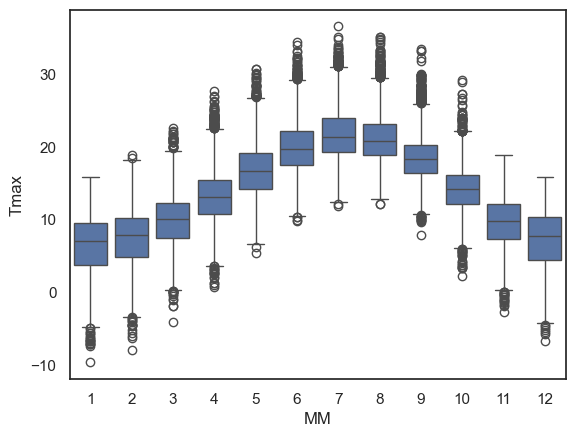

In [31]:
sns.boxplot(data=weather, x="MM", y="Tmax")
plt.show()

The **boxplot** is designed to show a handful of key features of the data distribution:

* The **bottom** and **top** of the box are the **25th** and **75th** quantiles (*1st* and *3rd* *quartiles*)
* The **line inside the box** is the **50th centile** (the *median*)
* the whiskers represent the *robust range* of the data 
    * if there are **no outliers**, the whiskers reach to the smallest and largest values
    * any values more than **1.5 x IQR** (interquartile range) are treated as **outliers** and plotted as individual dots

#### Less is more

Using a simple boxplot for each month, we can easily see the **trend across months** for warmer weather in the summer and cooler weather in the winter.

Within each month we can also see some information about the distribution - for example:

* Temperatures are more variable in winter and summer, than in autumn and spring
* In winter, the distribution of temperatures has negative skew (there are some unusually cold years)
* In summer the opposite is true, and there is a slight positive skew

*Note: Skew is evident from the position of the median within each box and the placement of outliers but this will become clearer in a violinplot (see below)*


## Violinplot

Using Python, you can make a slighly fancier version of the boxplot called a **violinplot**. 

The violinplot shows the **full distribution of data** rather than the few summary statistics captured in a boxplot. The *violin* shapeshows a smoothed estimate of the data's density mirrored on both sides of the central line, (essentially a KDE plot flipped on its side)

Let's give it a try using the function `sns.violinplot()`

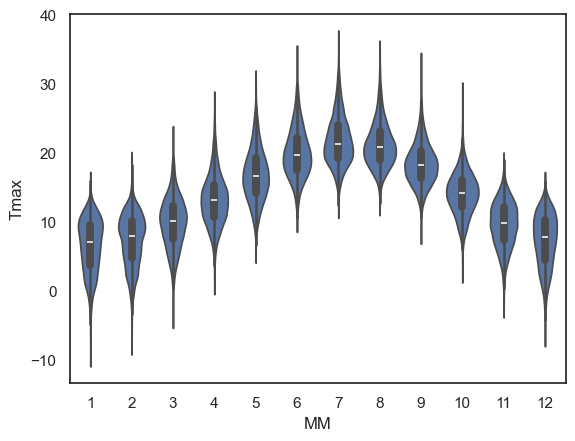

In [32]:
sns.violinplot(data=weather, x="MM", y="Tmax")
plt.show()

This is a nice compromise - still easy to "eyeball" the pattern across categories (in this case, across months) but giving plenty of detail within each category also

Note for example that the trend for:

* **negative skew** in temperature in winter (outliers represent cold days)
* **positive skew** in summer (outliers represent hot days)

...is much more clearly visible in the violin plot than in a box plot. The shape of each “violin” makes the asymmetry of the distribution clear at a glance.

#### Exercises

Try the following quick exercise:
* make a violin plot showing the minimum temperature in each month


In [22]:
# Your code here!

## Barplot

Sometimes, we want to show even less information, for example just the mean or median for each category.

We can do this using `sns.barplot()`.

For example, let's plot the **mean value of the maximum daily temperature (`Tmax`) in each month**:

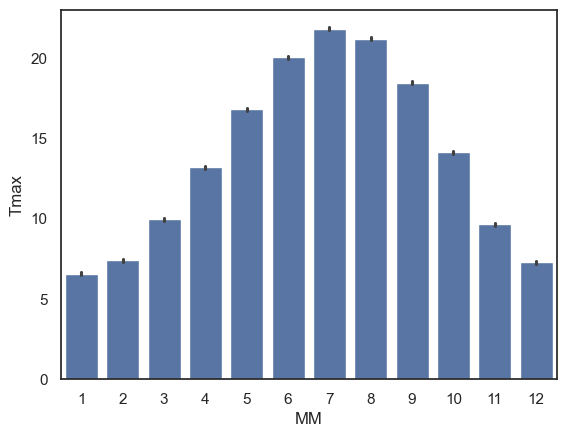

In [36]:
sns.barplot(data=weather, x='MM', y='Tmax')
plt.show()

* The **height** of each bar is the **mean** temperature in that month. If you’d prefer to summarise the data using a different statistic, you can change the function used via the parameter `estimator`.
* The **error bars** show the **95% confidence interval** around the mean by default, but this can also be adjust to display other measures of variability via the parameter `errorbar`.


#### Exercises

Try the following quick exercise:

In [7]:
# make a bar plot showing the mean rainfall in each month

## Countplot

Sometimes we are interested in **how many data points** fall in each category, rather than summarising via some statistic (e.g., mean, median). For this, we can use `sns.countplot`


One thing we can count from our weather dataset is the number of instances of each date (1st of the month, 2nd of the month, 3rd of the month....) although, I suppose the results won't be especially surprising...

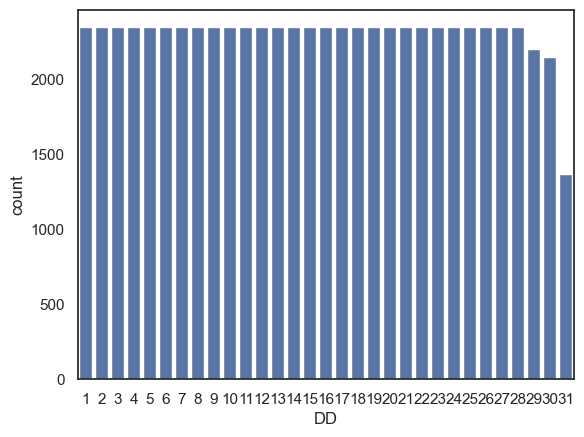

In [47]:
sns.countplot(data=weather, x='DD')
plt.show()

Another way we could use `sns.countplot()` is by creating a dataframe that contains only days fulfilling some criterion (eg, days with no rain) and then make a countplot based on this new dataframe:

*Note You can achieve the same result in a single line of code by applying the filter directly instide the plotting function: `sns.countplot(data=weather.query('Rainfall_mm == 0'), x='MM')`.*


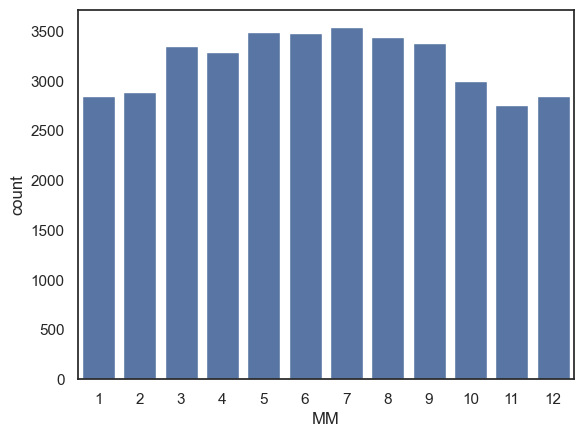

In [50]:
drydays = weather.query('Rainfall_mm == 0') # creates a whole new dataframe with only the 0mm rainfall days
sns.countplot(data=drydays, x='MM') # then count the number of days in each month
plt.show()

#### Exercises

Can you use `sns.countplot()` to show the number of days with frost (Tmin < 0) in each month?

In [11]:
# your code here

## Swarmplot

For smaller datasets, it can be helpful to plot **individual datapoints** instead of, or as well as, a plot of the distribution.

Let’s look at an example using a small, made-up dataset containing interview scores for 10 Oxford applicants. 

In [52]:
InterviewScores = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/CluedoInterview.csv")
display(InterviewScores)

Professor Green  Professor Peacock  Professor Plum
0                45                 52              55
1                47                 54              59
2                50                 55              60
3                51                 55              61
4                53                 56              64
5                53                 57              66
6                54                 61              69
7                54                 63              70
8                56                 63              72
9                58                 63              72
10               59                 64              72
11               60                 64              80

Each applicant was assessed by three interviewers, and we want to visualise their scores. Given that this is a small data set we may wish to plot every students' scores from each interviewer.

We can do this using a swarmplot:


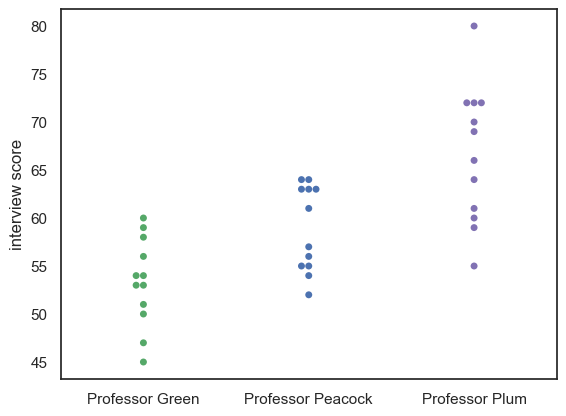

In [53]:
sns.swarmplot(data=InterviewScores, palette=['g','b','m']) # we may as well make the colours meaningful ;-))
plt.ylabel('interview score')
plt.show()

Maybe it would be nice to add a violinplot for each distribution as well:

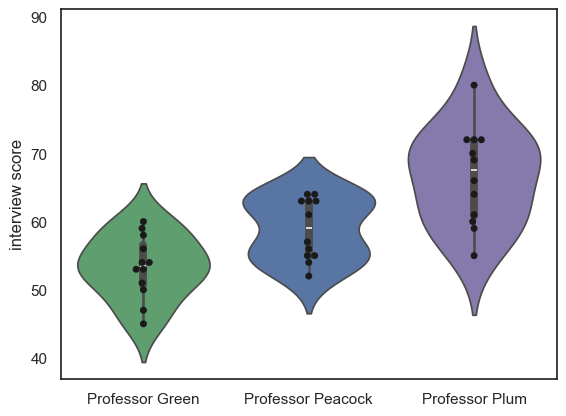

In [57]:
sns.violinplot(data=InterviewScores, palette=['g','b','m'], fill=True) # we may as well make the colours meaningful ;-))
sns.swarmplot(data=InterviewScores, palette=['k','k','k']) # use black dots for visibility
plt.ylabel('interview score')
plt.show()

**Note-**

We can see that each professor gives a different mean and range of scores, but we can't see how much agreement there is between the professors. 

## Lineplot

- `sns.lineplot(data = df.T)`


The data set contains three scores for each student (we can think of this as a *repeated measures* design), so an important question to ask is whether the professors were consistent:

* Professor Plum gives higher and more spread-out scores othan Professor Green
* But do students who score well with Professor Plum also score well with Professor Green?

Currently we can's answer that question, as we can see the students' individual scores from each professor, but we don't know which dot in Professor Plum's column corresponds to which dot in Professors Green and Peacock's columns.

We can use the function `sns.lineplot()` to help us here:

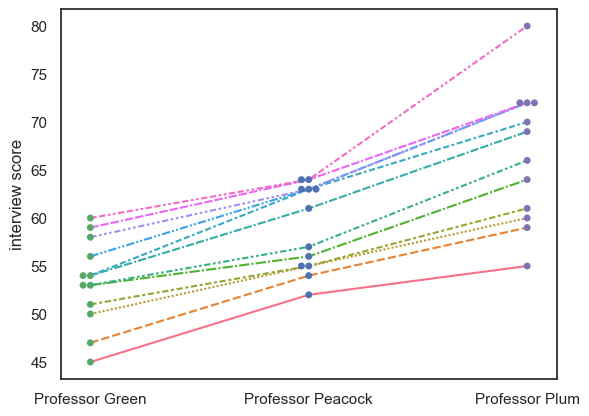

In [61]:
sns.swarmplot(data=InterviewScores, palette=['g','b','m'])
#sns.violinplot(data=InterviewScores, palette=['g','b','m'], fill=False ) 
sns.lineplot(data=InterviewScores.T, legend=False)
plt.ylabel('interview score')
plt.show()

**Note-**

We can see that, despite the different distributions of marks for each Professor, the students who do well with one professor tend to do well with the others; in other words the interviewers are consistent in their ranking of the students, if not in their numerical marks.

For comparison, an inconsistent dataset would look like this:

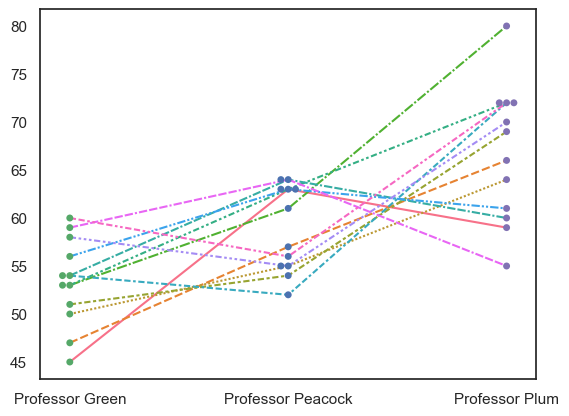

In [65]:
InterviewScoresShuffle = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/CluedoInterviewShuffle.csv")
sns.swarmplot(data=InterviewScoresShuffle, palette=['g','b','m']) 
#sns.violinplot(data=InterviewScoresShuffle, palette=['g','b','m'], fill=False ) 
sns.lineplot(data=InterviewScoresShuffle.T, legend=False)
plt.show()

### Note on Transpose (and maybe too much info for now...)

- `df.T`

To get a lineplot of categorical data, the syntax is a little fiddly. If we just run `sns.lineplot()` on our dataframe, it will try to plot each **column** as a line.

However, repeated measures data such as these are most often stored as *wideform data* . This means, each row is an individual (interviewee), and each column is a measurement for that given individual (scores from different professors). 

In our case, we actually want to plot each *row* as a line (one per interviewee), not each column.

To do this, we can transpose the dataframe effectively swapping the rows and columns using `.T` attribute. This tricks `sns.lineplot()` into plotting each row (individual person) as aa line, Here is the transposed dataframe:

In [66]:
InterviewScores.T

0   1   2   3   4   5   6   7   8   9   10  11
Professor Green    45  47  50  51  53  53  54  54  56  58  59  60
Professor Peacock  52  54  55  55  56  57  61  63  63  63  64  64
Professor Plum     55  59  60  61  64  66  69  70  72  72  72  80

... compare to the original, non-transposed one:

In [67]:
InterviewScores

Professor Green  Professor Peacock  Professor Plum
0                45                 52              55
1                47                 54              59
2                50                 55              60
3                51                 55              61
4                53                 56              64
5                53                 57              66
6                54                 61              69
7                54                 63              70
8                56                 63              72
9                58                 63              72
10               59                 64              72
11               60                 64              80

For **longform data**, that is, data where each row represents a single interview event, we can simply use the `hue` property of `sns.lineplot()` to get separate lines, no need to transpose anything.

Here is the interview dataset in longform:

In [69]:
InterviewScoresLongform = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/CluedoInterviewLongform.csv")
InterviewScoresLongform

studentID        Interviewer  Score
0       71215    Professor Green     45
1       71591    Professor Green     47
2       71616    Professor Green     50
3       72220    Professor Green     51
4       74952    Professor Green     53
5       75323    Professor Green     53
6       75524    Professor Green     54
7       75716    Professor Green     54
8       76917    Professor Green     56
9       77180    Professor Green     58
10      77540    Professor Green     59
11      78664    Professor Green     60
12      71215  Professor Peacock     52
13      71591  Professor Peacock     54
14      71616  Professor Peacock     55
15      72220  Professor Peacock     55
16      74952  Professor Peacock     56
17      75323  Professor Peacock     57
18      75524  Professor Peacock     61
19      75716  Professor Peacock     63
20      76917  Professor Peacock     63
21      77180  Professor Peacock     63
22      77540  Professor Peacock     64
23      78664  Professor Peacock     64
24      71215     Professor Plum     55
25      71591     Professor Plum     59
26      71616     Professor Plum     60
27      72220     Professor Plum     61
28      74952     Professor Plum     64
29      75323     Professor Plum     66
30      75524     Professor Plum     69
31      75716     Professor Plum     70
32      76917     Professor Plum     72
33      77180     Professor Plum     72
34      77540     Professor Plum     72
35      78664     Professor Plum     80

... and here is how we plot it:

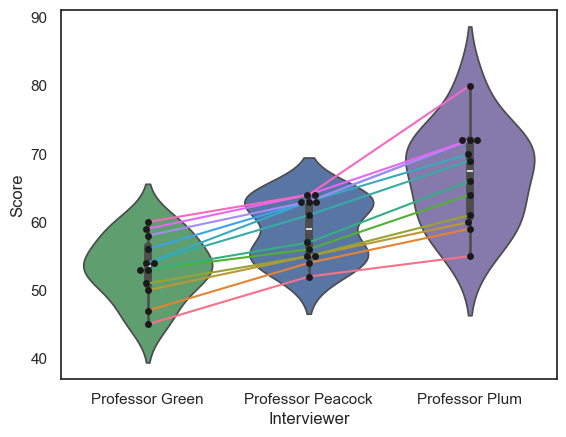

In [78]:
sns.swarmplot(data=InterviewScoresLongform, x='Interviewer', y="Score", color = 'k') 
sns.violinplot(data=InterviewScoresLongform,  x='Interviewer', y="Score", palette=['g','b','m'])
sns.lineplot(data=InterviewScoresLongform, x='Interviewer', y="Score", hue=InterviewScoresLongform.studentID.astype(str), legend = False)
plt.show()